## Grasp Inference v 0.1

A source code developed by Shehan Caldera (shehancaldera@gmail.com) for the purpose of predicting the robotic grasp
rectangles using the trained RGD-CNN on the augmented Cornell Grasp data. The inference output has the
following format ==> (RGB image, grasp rectangle params : x, y, theta, h, w ).

The model has a convolutional base with the architecture of Inception-ResNet

In [1]:
# Define the imports
import keras
import os
import numpy as np
import math
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean, rotate
from PIL import Image
from PIL import ImageOps
import scipy as sp
from skimage.util import crop
import matplotlib.pyplot as plt
import numpy as np
import pypcd
import time
from keras import backend as K
from keras.applications import Xception, VGG16, ResNet50, InceptionResNetV2
from keras import models
from keras import layers
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from shapely.geometry import Polygon
import math
from cgd_data_processing import CgdDataProcessing

/home/baxter/tensorflow/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/home/baxter/tensorflow/local/lib/python2.7/site-packages/google/protobuf/__init__.py:37: UserWarning: Module tensorflow was already imported from /home/baxter/tensorflow/local/lib/python2.7/site-packages/tensorflow/__init__.pyc, but /home/baxter/tensorflow/lib/python2.7/site-packages/tensorflow-1.8.0-py2.7-linux-x86_64.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
#GLOBAL VAR
IM_FILE = '/media/baxter/DataDisk/Cornell Grasps Dataset/rgb_aug/train/img1.png'
MODEL_FILE = 'grasp_detector_nightly_2018-05-16 00.43.32.h5'
TARGET_IMAGE_WIDTH = 224

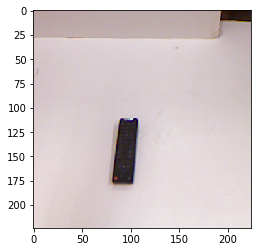

In [3]:
#Open image and visualise
img = Image.open(IM_FILE)

# Resize to 224x224
resized_img = img.resize((TARGET_IMAGE_WIDTH, TARGET_IMAGE_WIDTH))
im_array = np.asarray(img, dtype='float32')
plt.imshow(img)

In [7]:
#Load the model
def rse(y_true, y_pred):
    return K.sqrt(K.sum(K.square(y_pred - y_true)))

In [8]:
model = models.load_model('/home/baxter/PycharmProjects/rgd-cnn_models/grasp_detector_nightly_2018-05-17 18.32.18.h5')

ValueError: Unknown loss function:rse